## Predicting House Prices using Linear Regression

The regression model has been applied using python libraries- pandas, numpy, matplotlib, seaborn & sklearn.

In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### Load the data into a pandas Data Frame

In [2]:
df = pd.read_csv('./final_data.csv')
df.columns

Index(['Unnamed: 0', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'condition'],
      dtype='object')

#### Removing the Extra Column

In [3]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
print(df.shape)
df.head(10)

(21612, 7)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition
0,221900.0,3,1.00,1180,5650,1.0,3
1,538000.0,3,2.25,2570,7242,2.0,3
2,180000.0,2,1.00,770,10000,1.0,3
3,604000.0,4,3.00,1960,5000,1.0,5
4,510000.0,3,2.00,1680,8080,1.0,3
5,1225000.0,4,4.50,5420,101930,1.0,3
6,257500.0,3,2.25,1715,6819,2.0,3
7,291850.0,3,1.50,1060,9711,1.0,3
8,229500.0,3,1.00,1780,7470,1.0,3
9,323000.0,3,2.50,1890,6560,2.0,3


### Using Simple Linear Regression to understand relationship between house price and the living area

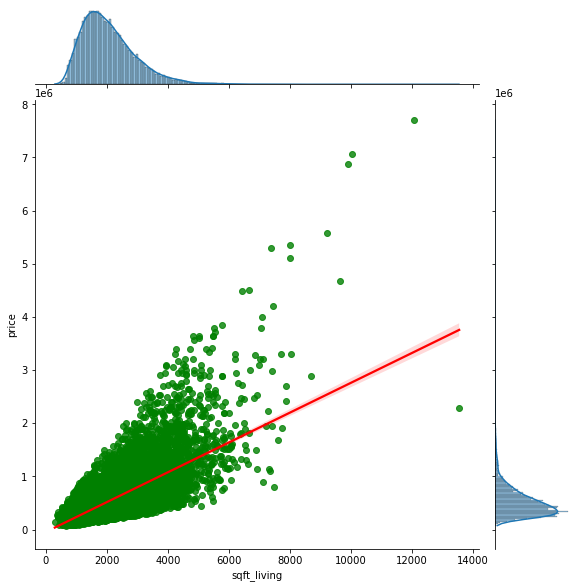

In [4]:
sns.jointplot(x='sqft_living',y='price', kind='reg', data=df, height=8.27,
              joint_kws={
                  'color':'green',
                  'line_kws':{'color':'red'}
              })

### Analysing the Data

In [5]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition
count,2.161200e+04,21612.000000,21612.000000,21612.000000,2.161200e+04,21612.000000,21612.000000
mean,5.400835e+05,3.369471,2.114774,2079.921016,1.510739e+04,1.494332,3.409356
std,3.671351e+05,0.907982,0.770177,918.456818,4.142142e+04,0.539991,0.650668
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000
25%,3.218375e+05,3.000000,1.750000,1426.500000,5.040000e+03,1.000000,3.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.619000e+03,1.500000,3.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068825e+04,2.000000,4.000000
max,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,5.000000


In [6]:
df.sample(7)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition
2638,246500.0,3,1.50,1270,11600,1.0,4
9640,446250.0,3,2.50,2380,214315,1.5,3
2857,423700.0,3,2.50,2070,3986,2.0,3
21368,455950.0,4,2.50,2720,5771,2.0,3
13370,600000.0,3,1.75,1580,7416,1.0,3
12994,749000.0,4,1.50,2130,5000,2.0,4
10435,170500.0,3,1.00,1640,13939,1.0,3


In [7]:
df.isnull().sum()

price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
condition      0
dtype: int64

#### RANGE AND DISTRIBUTION OF VALUES FOR ALL THE INDEPENDENT VARIABLES

array([[<AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>],
       [<AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'sqft_lot'}>],
       [<AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'condition'}>]], dtype=object)

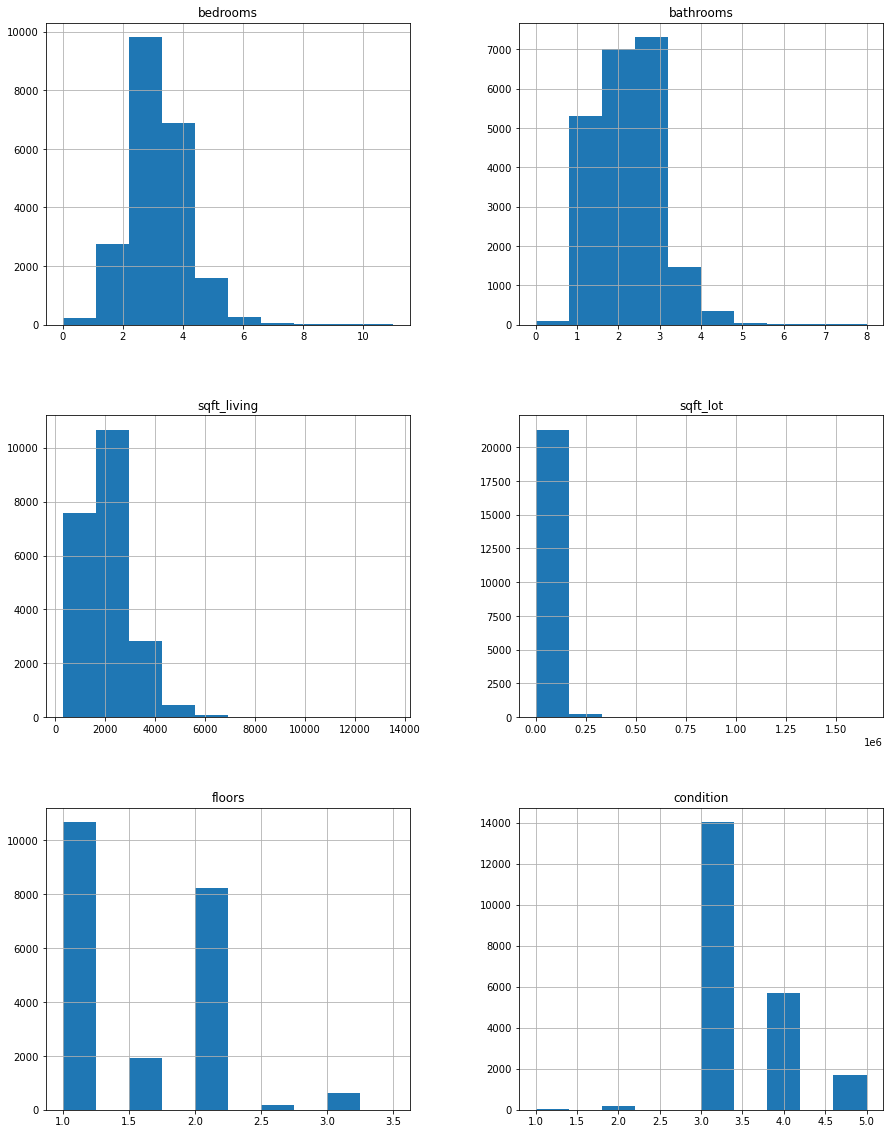

In [8]:
df.drop(['price'], axis=1).hist(figsize=(15,20))

#### Plotting the Correlation

<AxesSubplot:>

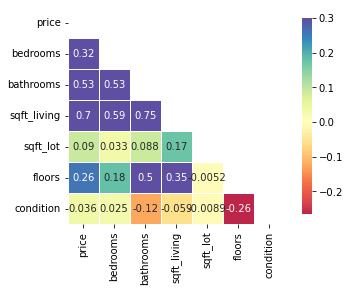

In [9]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

# Draw the heatmap with the mask
sns.heatmap(df.corr(), mask=mask, cmap='Spectral', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .9}, annot=True)

In [10]:
sns.set(rc={'figure.figsize':(15.2,8.27)})
sns.set_style('whitegrid')

#### Using the Piar Plot Visualization

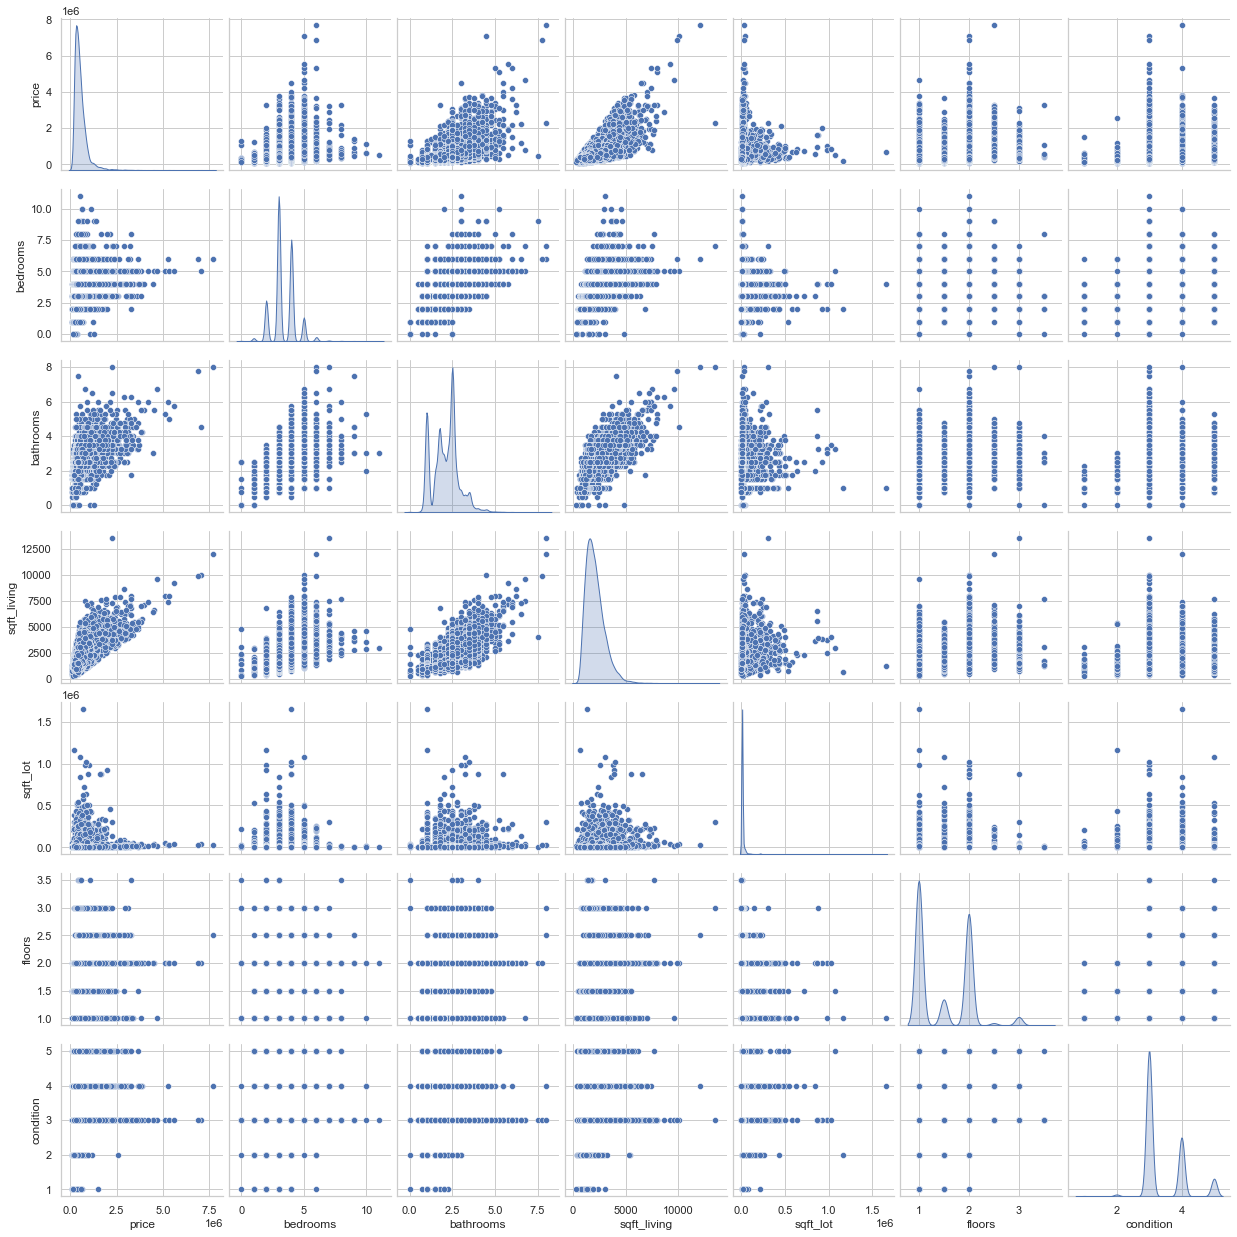

In [11]:
sns.pairplot(df, diag_kind='kde')

### Boxplot showing the range of house prices for different number of bedrooms
From the Boxplot it is observed that:
- Gradual rise in prices with increase in number of bedrooms 
- Range of bedrooms in our dataset varies from 0 to a maximum value of 11
- Price range also varies a lot when we have more than 5 bedrooms in the house and similarly very less variation in case a smaller number of bedrooms.

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

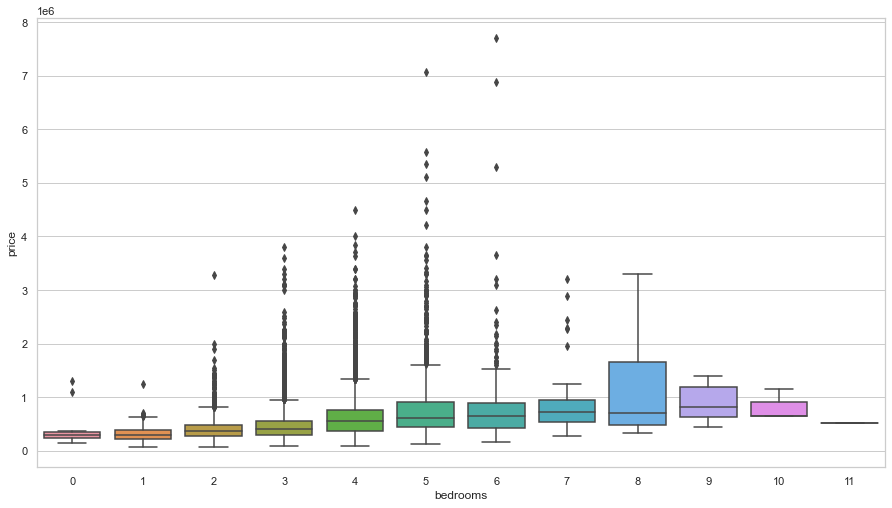

In [12]:
sns.boxplot(x='bedrooms', y='price', data=df)

### Boxplot showing the range of house prices for different number of bathrooms
In our dataset we have houses with 0 bathrooms to houses with 8 bathrooms.
With the increase in the number of bathrooms, we can notice a gradual increase in price of the house.
Also, we can notice that deviation in price of the house is less when number of bathrooms are less in a house, but deviation tends to increase with increase in number of bathrooms.

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

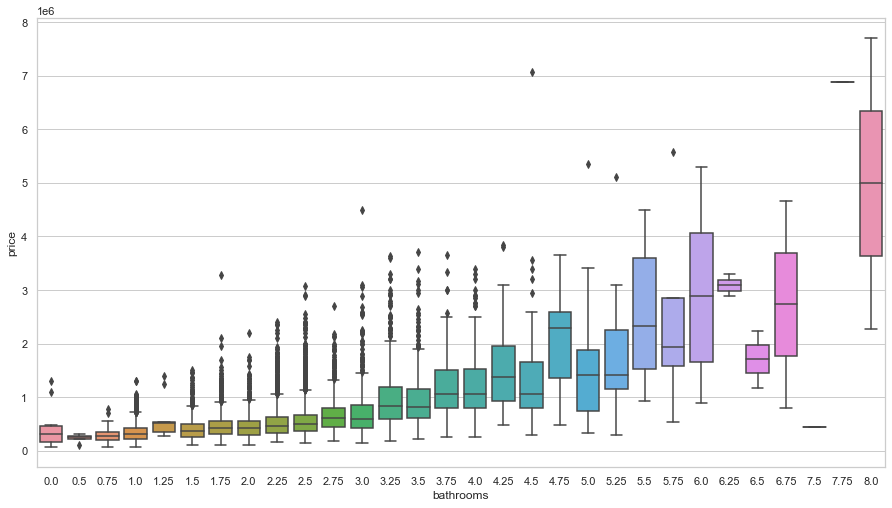

In [13]:
sns.boxplot(x='bathrooms', y='price', data=df)

### HISTOGRAM SHOWING THE DISTRIBUTION OF HOUSE LIVING AREA (IN SQFT)
Understanding the distribution of houses in terms of living area. Distribution is right-skewed with the maximum number of houses available are of 2000 sqft living area. Houses with more than 5000 sqft living are very few as they fall under luxury category.

/Users/agurbaxani/opt/anaconda3/envs/spyder505/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sqft_living', ylabel='Density'>

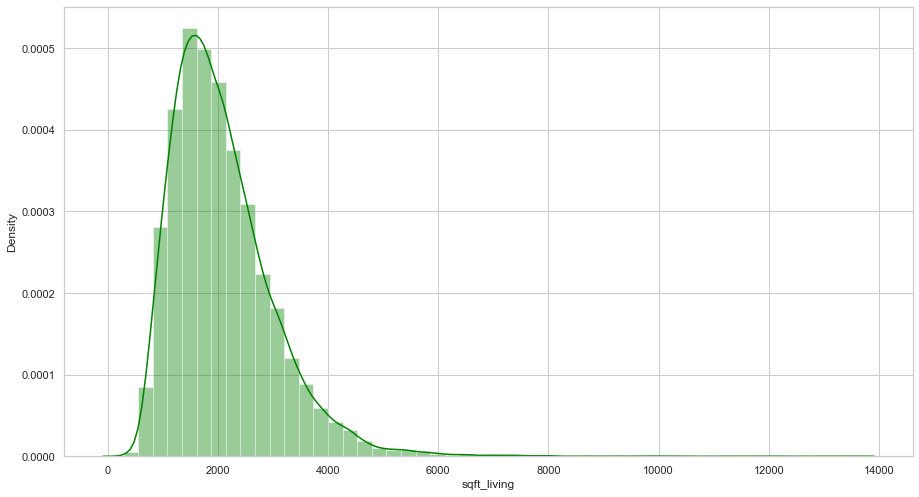

In [14]:
sns.distplot(df['sqft_living'], color="green")

### HISTOGRAM SHOWING THE DISTRIBUTION OF HOUSE TOTAL AREA (IN SQFT)
This factor includes the total area of the property, including the house, lawn, etc., in square feet area. The Range of total square feet is available in the dataset is exceptional.

/Users/agurbaxani/opt/anaconda3/envs/spyder505/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sqft_lot', ylabel='Density'>

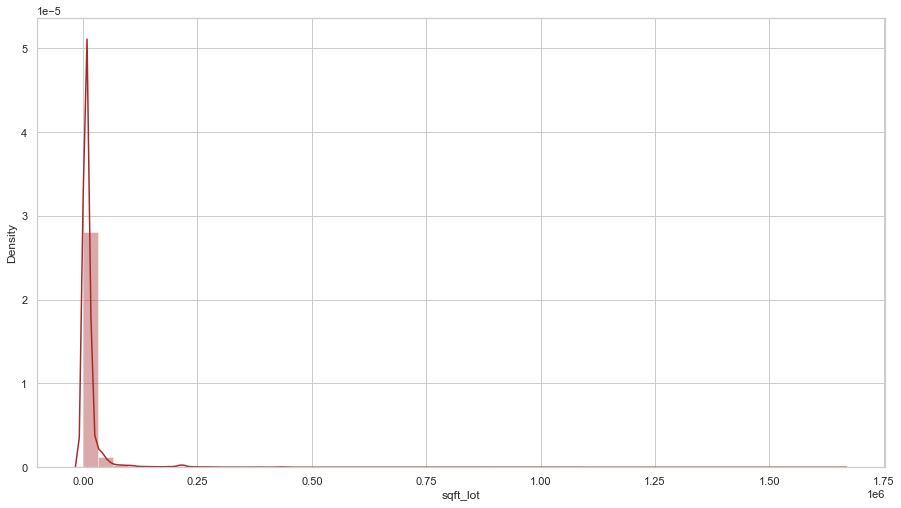

In [15]:
sns.distplot(df['sqft_lot'], color="brown")

### BOXPLOT SHOWING THE RANGE OF HOUSE PRICES FOR THE DIFFERENT NUMBER OF FLOORS
Understanding how the price of a house differs with a different number of floors in a house.
The range in our dataset for number of floors in the house varies 1 to 3.5 (where 3.5 signifies 3 complete floors with half terrace and half floor).
Although the maximum number of houses lie in 1 floor category followed by 2 floor houses but deviation in housing prices is most in case of 2.5 floor houses.
Number of floors in a major factor when deciding house prices.

<AxesSubplot:xlabel='floors', ylabel='price'>

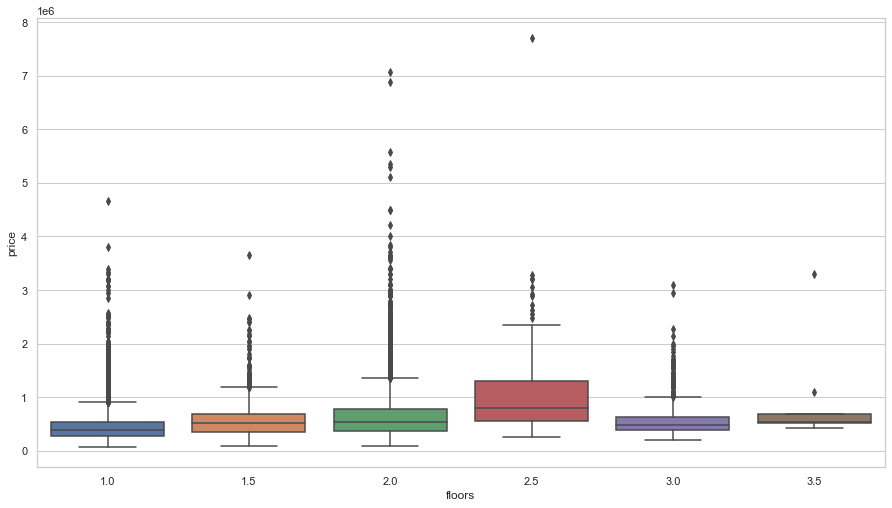

In [16]:
sns.boxplot(x='floors', y='price', data=df)

### Boxplot showing the range of house prices for the different condition ratings
Condition of a house plays a significant role in predicting the price of a house irrespective of other variables.
We can notice the increase in price of the house with better house condition.
The condition of houses varies from 1 to 5 with 1 being the lowest rating for house condition and 5 being the highest.
Majority of houses lie in 3rd condition followed by 4th.

<AxesSubplot:xlabel='condition', ylabel='price'>

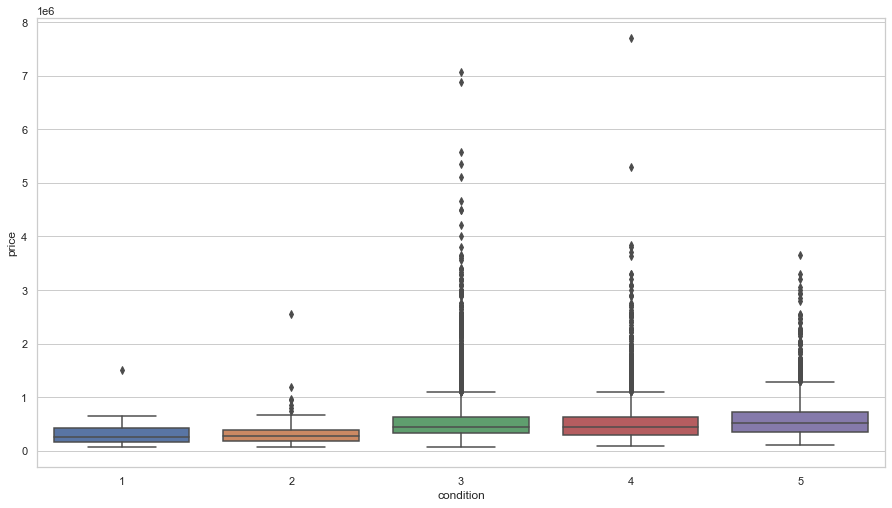

In [17]:
sns.boxplot(x='condition', y='price', data=df)

### Building the Linear Regression Model
- Place all the independent variable columns in X data frame and the dependent variable column in the Y data frame.
- An instance of the Linear Regression model is created, and the data is fit into this model.

In [18]:
from sklearn.linear_model import LinearRegression

x = df.drop(['price'], axis=1)
y = df['price']

model = LinearRegression()
model.fit(x, y)

LinearRegression()

### View the Incept and Coefficents for fitted data

In [19]:
#Print the Intercept and Coefficents
#Estimating the values upto 3 decimal places

print("b_%1d: %11.3f" % (0,model.intercept_))

for i in range(len(model.coef_)):
    print("b_%1d: %11.3f" % (i+1,model.coef_[i]))

b_0: -108676.020
b_1:  -68318.358
b_2:   11424.827
b_3:     315.553
b_4:      -0.376
b_5:   14184.491
b_6:   53659.969


#### Checking the Model Score against fitted data

In [20]:
model.score(x, y)

0.5185092327321064